# Importing Libraries

In [48]:
import requests
import json
import pandas as pd
import pymongo
from pymongo import MongoClient
import psycopg2
import csv
import missingno as msno
import seaborn as sns
import plotly as plt

# Extracting Api to load data and Writing Loaded data to JSON to File in python

In [9]:
response = requests.get("https://data.cityofnewyork.us/resource/mv4k-y93f.json")
# print(response.status_code)
json1 = response.json()
with open('data_finz.json', 'w') as outfile:
      json.dump(json1, outfile)

# Creating Database and collection in MONGODB and inserting  json file in that collection

In [10]:
client = MongoClient('localhost', 27017)
db = client['Criminal_court_summon_finals']
collection_data = db['Data_new_fiz']

with open(r'data_finz.json', 'r') as fii:
    file_data = json.load(fii)
    collection_data.insert_many(file_data)
client.close()

# convert entire collection from Mongodb to Pandas dataframe

In [11]:

df = pd.DataFrame(list(collection_data.find()))
df

,_id,age_group,boro,jurisdiction_code,latitude,law_description,law_section_number,longitude,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key,x_coordinate_cd,y_coordinate_cd
0,5df227ccf5ca410fa917aaf4,UNKNOWN,NEW YORK,0,40.718514334000076,NYS Transportation,CFR 49,-73.98536600299997,FEDERAL MOTOR VEH. SAFETY REG,7,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203095282,988307,201048
1,5df227ccf5ca410fa917aaf5,18-24,BRONX,1,40.83778161800007,NaN,1050.4(A),-73.91945797099999,NON PAYMENT OF FARE (OTHER),52,BLACK,M,NaN,2019-09-30T00:00:00.000,203344255,1006537,244511
2,5df227ccf5ca410fa917aaf6,UNKNOWN,NEW YORK,0,40.75952460900004,NYS Transportation,CFR 49,-73.99925785699998,FEDERAL MOTOR VEH. SAFETY REG,10,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058121,984456,215989
3,5df227ccf5ca410fa917aaf7,UNKNOWN,NEW YORK,0,40.76781470600001,NYS Transportation,999,-73.95909151199999,OTHER NYS TRANSPORTATION,19,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058103,995582,219012
4,5df227ccf5ca410fa917aaf8,UNKNOWN,NEW YORK,0,40.76781470600001,Administrative Code,11-809,-73.95909151199999,NO TAX STAMP,19,NaN,NaN,TLC,2019-09-30T00:00:00.000,203058099,995582,219012
5,5df227ccf5ca410fa917aaf9,UNKNOWN,NEW YORK,0,40.71787216100006,ABC,9999,-73.98617781499998,OTHER TRAFFIC REG,7,NaN,NaN,OTHER ABC,2019-09-30T00:00:00.000,203058067,988082,200814
6,5df227ccf5ca410fa917aafa,45-64,BRONX,1,40.81608887400005,NaN,1050.4(A),-73.917688689,NON PAYMENT OF FARE (OTHER),40,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058043,1007034,236608
7,5df227ccf5ca410fa917aafb,45-64,BRONX,0,40.82407474000007,NaN,512,-73.90871090099995,OPERATION WHILE REGISTRATION OR PRIVILEGE IS S...,42,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058033,1009516,239520
8,5df227ccf5ca410fa917aafc,18-24,BRONX,0,40.71812038400003,NaN,16-118(6),-73.95743012599996,PUBLIC URINATION,44,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203190685,996051,200907
9,5df227ccf5ca410fa917aafd,65+,QUEENS,0,40.68485081700004,Administrative Code,19-507,-73.79280352899997,ACCEPT ON HAIL,113,BLACK,M,TLC,2019-09-30T00:00:00.000,203063504,1041715,188851


In [151]:
df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)

In [169]:
import folium
map = folium.Map(location=[40.693943, -73.985880], default_zoom_start=15)
folium.Marker(
    location=[40.693943, -73.985880],
    popup='Welcome to <b>NEW YORK CITY</b>',
    tooltip = "Click for more"
).add_to(map)
map

In [154]:
df

,_id,age_group,boro,jurisdiction_code,latitude,law_description,law_section_number,longitude,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key,x_coordinate_cd,y_coordinate_cd
0,5df227ccf5ca410fa917aaf4,UNKNOWN,NEW YORK,0,40.718514,NYS Transportation,CFR 49,-73.985366,FEDERAL MOTOR VEH. SAFETY REG,7,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203095282,988307,201048
1,5df227ccf5ca410fa917aaf5,18-24,BRONX,1,40.837782,NaN,1050.4(A),-73.919458,NON PAYMENT OF FARE (OTHER),52,BLACK,M,NaN,2019-09-30T00:00:00.000,203344255,1006537,244511
2,5df227ccf5ca410fa917aaf6,UNKNOWN,NEW YORK,0,40.759525,NYS Transportation,CFR 49,-73.999258,FEDERAL MOTOR VEH. SAFETY REG,10,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058121,984456,215989
3,5df227ccf5ca410fa917aaf7,UNKNOWN,NEW YORK,0,40.767815,NYS Transportation,999,-73.959092,OTHER NYS TRANSPORTATION,19,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058103,995582,219012
4,5df227ccf5ca410fa917aaf8,UNKNOWN,NEW YORK,0,40.767815,Administrative Code,11-809,-73.959092,NO TAX STAMP,19,NaN,NaN,TLC,2019-09-30T00:00:00.000,203058099,995582,219012
5,5df227ccf5ca410fa917aaf9,UNKNOWN,NEW YORK,0,40.717872,ABC,9999,-73.986178,OTHER TRAFFIC REG,7,NaN,NaN,OTHER ABC,2019-09-30T00:00:00.000,203058067,988082,200814
6,5df227ccf5ca410fa917aafa,45-64,BRONX,1,40.816089,NaN,1050.4(A),-73.917689,NON PAYMENT OF FARE (OTHER),40,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058043,1007034,236608
7,5df227ccf5ca410fa917aafb,45-64,BRONX,0,40.824075,NaN,512,-73.908711,OPERATION WHILE REGISTRATION OR PRIVILEGE IS S...,42,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058033,1009516,239520
8,5df227ccf5ca410fa917aafc,18-24,BRONX,0,40.718120,NaN,16-118(6),-73.957430,PUBLIC URINATION,44,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203190685,996051,200907
9,5df227ccf5ca410fa917aafd,65+,QUEENS,0,40.684851,Administrative Code,19-507,-73.792804,ACCEPT ON HAIL,113,BLACK,M,TLC,2019-09-30T00:00:00.000,203063504,1041715,188851


# Visualizing Null values by correlation matrix

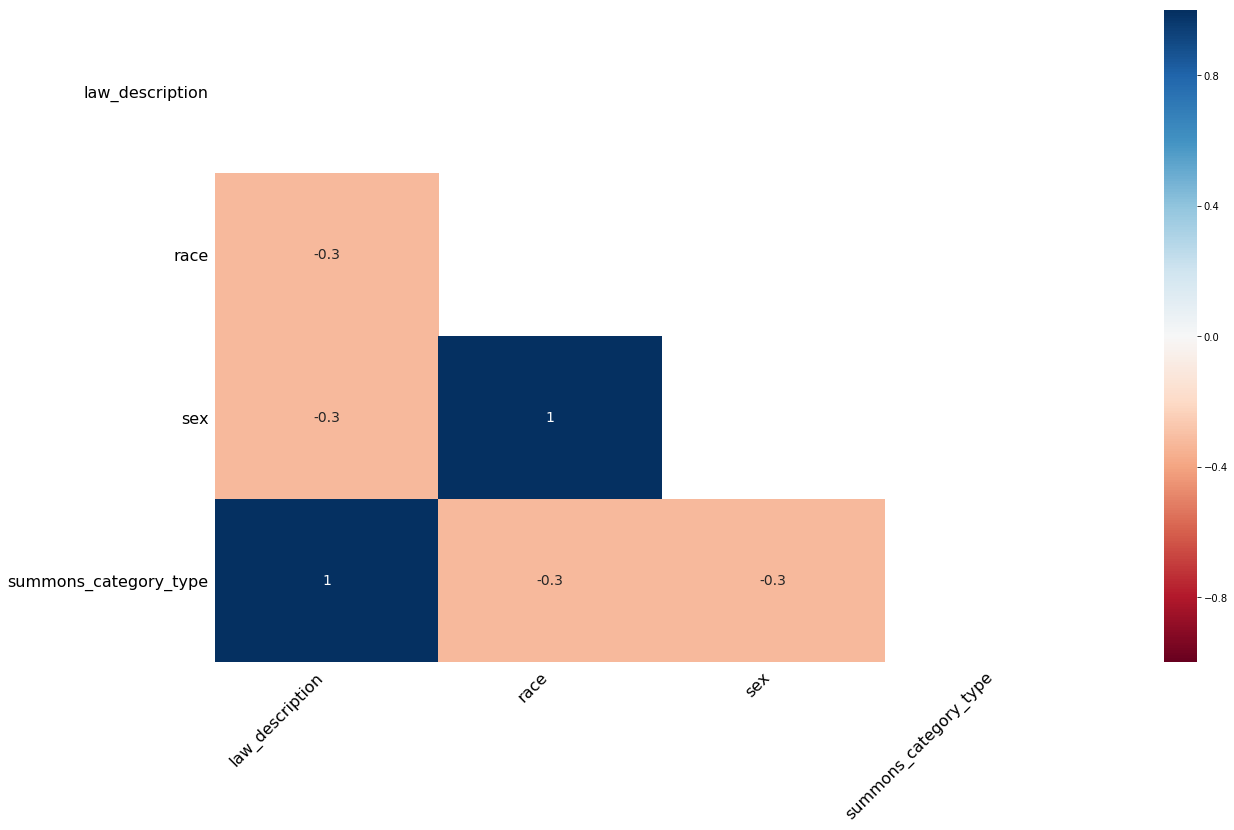

In [12]:
msno.heatmap(df)

# Visualizing Null values by importing missingno libraray matrix

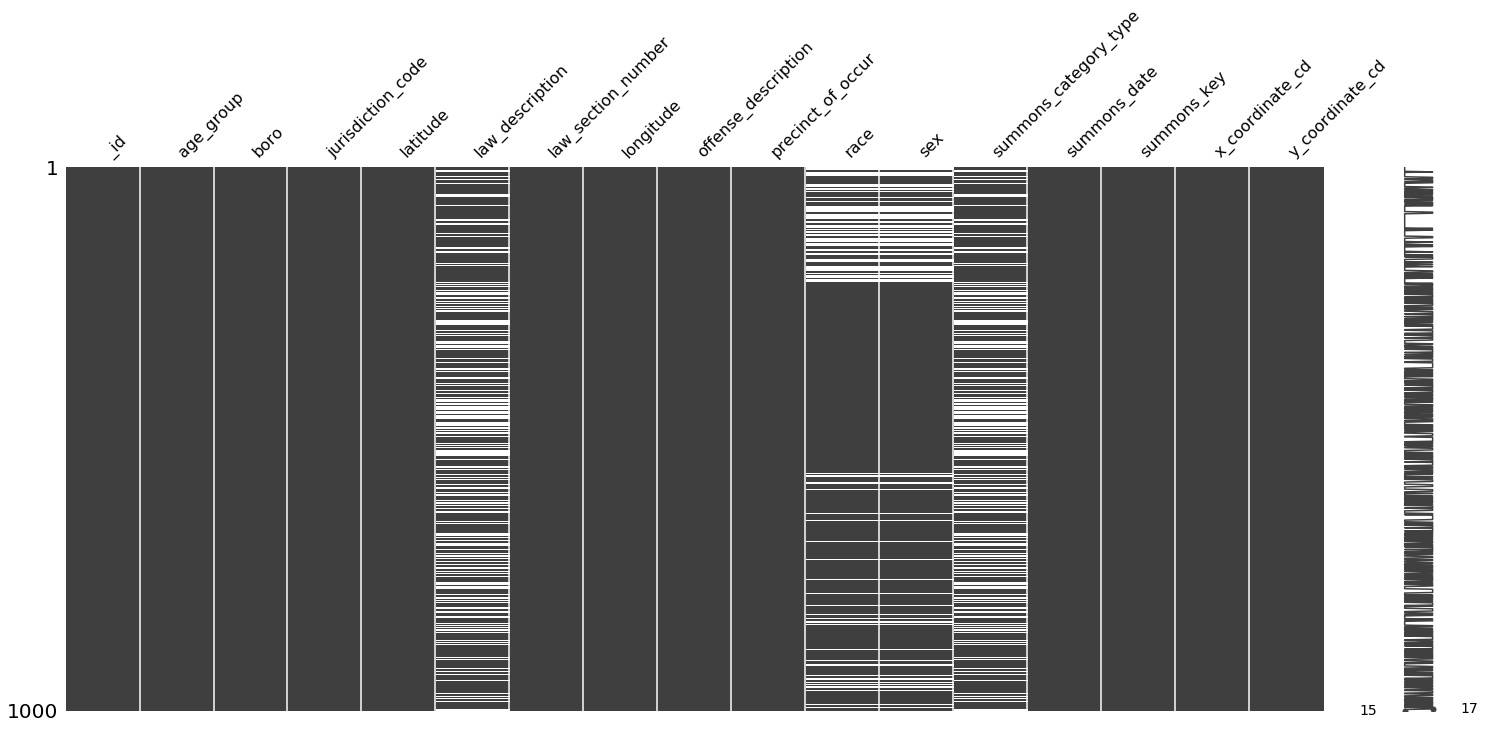

In [19]:
msno.matrix(df)

In [13]:
df.isnull().sum() # Checking sum of missing values in each variables

_id                        0
age_group                  0
boro                       0
jurisdiction_code          0
latitude                   0
law_description          336
law_section_number         0
longitude                  0
offense_description        0
precinct_of_occur          0
race                     174
sex                      174
summons_category_type    336
summons_date               0
summons_key                0
x_coordinate_cd            0
y_coordinate_cd            0
dtype: int64

In [14]:
df.info() #Checking dataset columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
_id                      1000 non-null object
age_group                1000 non-null object
boro                     1000 non-null object
jurisdiction_code        1000 non-null object
latitude                 1000 non-null object
law_description          664 non-null object
law_section_number       1000 non-null object
longitude                1000 non-null object
offense_description      1000 non-null object
precinct_of_occur        1000 non-null object
race                     826 non-null object
sex                      826 non-null object
summons_category_type    664 non-null object
summons_date             1000 non-null object
summons_key              1000 non-null object
x_coordinate_cd          1000 non-null object
y_coordinate_cd          1000 non-null object
dtypes: object(17)
memory usage: 132.9+ KB


In [ ]:
# Copying data for backup
data_fi = df.copy()
len(data_fi)


# Cleaning Dataset

In [16]:
# Dropping the columns which are not required for analysis
data_fi = data_fi.drop(["_id", "jurisdiction_code","latitude","longitude","x_coordinate_cd","y_coordinate_cd"], axis=1)
data_fi

,age_group,boro,law_description,law_section_number,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key
0,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,7,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203095282
1,18-24,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),52,BLACK,M,NaN,2019-09-30T00:00:00.000,203344255
2,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,10,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058121
3,UNKNOWN,NEW YORK,NYS Transportation,999,OTHER NYS TRANSPORTATION,19,NaN,NaN,NYS TRANS,2019-09-30T00:00:00.000,203058103
4,UNKNOWN,NEW YORK,Administrative Code,11-809,NO TAX STAMP,19,NaN,NaN,TLC,2019-09-30T00:00:00.000,203058099
5,UNKNOWN,NEW YORK,ABC,9999,OTHER TRAFFIC REG,7,NaN,NaN,OTHER ABC,2019-09-30T00:00:00.000,203058067
6,45-64,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),40,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058043
7,45-64,BRONX,NaN,512,OPERATION WHILE REGISTRATION OR PRIVILEGE IS S...,42,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203058033
8,18-24,BRONX,NaN,16-118(6),PUBLIC URINATION,44,WHITE HISPANIC,M,NaN,2019-09-30T00:00:00.000,203190685
9,65+,QUEENS,Administrative Code,19-507,ACCEPT ON HAIL,113,BLACK,M,TLC,2019-09-30T00:00:00.000,203063504


In [17]:
# changing Data types ofparticular columns
data_fi["precinct_of_occur"]= data_fi["precinct_of_occur"].astype(int)
data_fi['summons_date']=[x.strip().replace('T00:00:00.000', ' ') for x in data_fi['summons_date']]
data_fi['summons_date']=data_fi['summons_date'].astype('object') 
date = data_fi['summons_date']

# converting summons_key into int
data_fi["summons_key"]= data_fi["summons_key"].astype(int)

In [19]:
# Checking Datatypes of our dataframe after amendments
data_fi['summons_date']=data_fi['summons_date'].astype('object')
data_fi.dtypes

age_group                object
boro                     object
law_description          object
law_section_number       object
offense_description      object
precinct_of_occur         int32
race                     object
sex                      object
summons_category_type    object
summons_date             object
summons_key               int32
dtype: object

In [20]:
# Checking Null values again
data_fi.isnull().sum()

age_group                  0
boro                       0
law_description          336
law_section_number         0
offense_description        0
precinct_of_occur          0
race                     174
sex                      174
summons_category_type    336
summons_date               0
summons_key                0
dtype: int64

In [21]:
data_fi

,age_group,boro,law_description,law_section_number,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key
0,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,7,NaN,NaN,NYS TRANS,2019-09-30,203095282
1,18-24,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),52,BLACK,Male,NaN,2019-09-30,203344255
2,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,10,NaN,NaN,NYS TRANS,2019-09-30,203058121
3,UNKNOWN,NEW YORK,NYS Transportation,999,OTHER NYS TRANSPORTATION,19,NaN,NaN,NYS TRANS,2019-09-30,203058103
4,UNKNOWN,NEW YORK,Administrative Code,11-809,NO TAX STAMP,19,NaN,NaN,TLC,2019-09-30,203058099
5,UNKNOWN,NEW YORK,ABC,9999,OTHER TRAFFIC REG,7,NaN,NaN,OTHER ABC,2019-09-30,203058067
6,45-64,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),40,WHITE HISPANIC,Male,NaN,2019-09-30,203058043
7,45-64,BRONX,NaN,512,OPERATION WHILE REGISTRATION OR PRIVILEGE IS S...,42,WHITE HISPANIC,Male,NaN,2019-09-30,203058033
8,18-24,BRONX,NaN,16-118(6),PUBLIC URINATION,44,WHITE HISPANIC,Male,NaN,2019-09-30,203190685
9,65+,QUEENS,Administrative Code,19-507,ACCEPT ON HAIL,113,BLACK,Male,TLC,2019-09-30,203063504


In [22]:
df1 = data_fi.copy() # copying inleaned dataset to another variable

In [23]:
len(df1)

1000

In [24]:
df1 = df1.drop_duplicates()# hecking any dublicates to drop
len(df1)

1000

# Filling Missing NA Values

In [25]:
# Filling Missing values
df1

,age_group,boro,law_description,law_section_number,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key
0,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,7,NaN,NaN,NYS TRANS,2019-09-30,203095282
1,18-24,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),52,BLACK,Male,NaN,2019-09-30,203344255
2,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,10,NaN,NaN,NYS TRANS,2019-09-30,203058121
3,UNKNOWN,NEW YORK,NYS Transportation,999,OTHER NYS TRANSPORTATION,19,NaN,NaN,NYS TRANS,2019-09-30,203058103
4,UNKNOWN,NEW YORK,Administrative Code,11-809,NO TAX STAMP,19,NaN,NaN,TLC,2019-09-30,203058099
5,UNKNOWN,NEW YORK,ABC,9999,OTHER TRAFFIC REG,7,NaN,NaN,OTHER ABC,2019-09-30,203058067
6,45-64,BRONX,NaN,1050.4(A),NON PAYMENT OF FARE (OTHER),40,WHITE HISPANIC,Male,NaN,2019-09-30,203058043
7,45-64,BRONX,NaN,512,OPERATION WHILE REGISTRATION OR PRIVILEGE IS S...,42,WHITE HISPANIC,Male,NaN,2019-09-30,203058033
8,18-24,BRONX,NaN,16-118(6),PUBLIC URINATION,44,WHITE HISPANIC,Male,NaN,2019-09-30,203190685
9,65+,QUEENS,Administrative Code,19-507,ACCEPT ON HAIL,113,BLACK,Male,TLC,2019-09-30,203063504


In [26]:
df1["law_description"].fillna( method ='ffill',inplace = True)


In [27]:
df1["race"].fillna( method ='bfill',inplace = True)

In [28]:
df1["sex"].fillna( method ='bfill',inplace = True)

In [29]:
df1["summons_category_type"].fillna( method ='ffill',inplace = True)

In [30]:
df1.isnull().sum()

age_group                0
boro                     0
law_description          0
law_section_number       0
offense_description      0
precinct_of_occur        0
race                     0
sex                      0
summons_category_type    0
summons_date             0
summons_key              0
dtype: int64

In [31]:
df1['sex'].unique()
df1['sex'] = df1['sex'].replace('M','Male')
df1['sex'] = df1['sex'].replace('F','Female')
df1['sex'] = df1['sex'].replace('U','Unknown')
df1['sex']

0      Male
1      Male
2      Male
3      Male
4      Male
5      Male
6      Male
7      Male
8      Male
9      Male
10     Male
11     Male
12     Male
13     Male
14     Male
15     Male
16     Male
17     Male
18     Male
19     Male
20     Male
21     Male
22     Male
23     Male
24     Male
25     Male
26     Male
27     Male
28     Male
29     Male
       ... 
970    Male
971    Male
972    Male
973    Male
974    Male
975    Male
976    Male
977    Male
978    Male
979    Male
980    Male
981    Male
982    Male
983    Male
984    Male
985    Male
986    Male
987    Male
988    Male
989    Male
990    Male
991    Male
992    Male
993    Male
994    Male
995    Male
996    Male
997    Male
998    Male
999    Male
Name: sex, Length: 1000, dtype: object

# Converting our Dataframe into python 

In [32]:
df1.to_csv('Python_project_DAP.csv',index = None,encoding="UTF-8", header=True)

# Connecting to postgresql and creating our database to store structured data

In [34]:

try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "postgres")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute('CREATE DATABASE CriminalCourts_f7;')
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()

# Creating table in our database

In [35]:
# Creating Tables 
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "criminalcourts_f7")
    dbConnection.set_isolation_level(0) # AUTOCOMMIT
    dbCursor = dbConnection.cursor()
    dbCursor.execute("""
    CREATE TABLE criminalcourts_new_Done_fi(
        age_group VARCHAR(255),
        boro VARCHAR(255),
        law_description VARCHAR(255),           
        law_section_number VARCHAR(255),       
        offense_description TEXT,      
        precinct_of_occur INT,
        race VARCHAR(255),
        sex VARCHAR(255),
        summons_category_type VARCHAR(255), 
        summons_date date,
        summons_key INT PRIMARY KEY
        
    );
    """)
    dbCursor.execute("SET datestyle TO dmy ")
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error while connecting to PostgreSQL", dbError)
finally:
    if(dbConnection): dbConnection.close()


# Inserting our csv file into our created postgres database table

In [37]:
import csv
try:
    dbConnection = psycopg2.connect(
        user = "dap",
        password = "dap",
        host = "192.168.56.30",
        port = "5432",
        database = "criminalcourts_f7")
    dbConnection.set_isolation_level(0) 
    dbCursor = dbConnection.cursor()
    with open('C:/Users/Imran/python_project_DAP.csv', 'r') as f:
        read = csv.reader(f)
        next(read)
        for row in read:
            dbCursor.execute("INSERT INTO criminalcourts_new_Done_fi VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",row)
        dbConnection.commit() 
        
    dbCursor.close()
except (Exception , psycopg2.Error) as dbError :
    print ("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()
        

# Conveting our Postgresql query into pandas dataframe

In [38]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
sql = "SELECT * from criminalcourts_new_Done_f"
try:
    dbConnection = psycopg2.connect(
    user = "dap",
    password = "dap",
    host = "192.168.56.30",
    port = "5432",
    database = "criminalcourts_f6")
    cc_dataframe = sqlio.read_sql_query(sql, dbConnection)
except (Exception , psycopg2.Error) as dbError :
    print("Error:", dbError)
finally:
    if(dbConnection): dbConnection.close()

In [73]:
cc_dataframe.head() # checking our new datframe

,age_group,boro,law_description,law_section_number,offense_description,precinct_of_occur,race,sex,summons_category_type,summons_date,summons_key
0,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,7,BLACK,Male,NYS TRANS,2019-09-30,203095282
1,18-24,BRONX,NYS Transportation,1050.4(A),NON PAYMENT OF FARE (OTHER),52,BLACK,Male,NYS TRANS,2019-09-30,203344255
2,UNKNOWN,NEW YORK,NYS Transportation,CFR 49,FEDERAL MOTOR VEH. SAFETY REG,10,WHITE HISPANIC,Male,NYS TRANS,2019-09-30,203058121
3,UNKNOWN,NEW YORK,NYS Transportation,999,OTHER NYS TRANSPORTATION,19,WHITE HISPANIC,Male,NYS TRANS,2019-09-30,203058103
4,UNKNOWN,NEW YORK,Administrative Code,11-809,NO TAX STAMP,19,WHITE HISPANIC,Male,TLC,2019-09-30,203058099


In [40]:
cc_dataframe.dtypes

age_group                object
boro                     object
law_description          object
law_section_number       object
offense_description      object
precinct_of_occur         int64
race                     object
sex                      object
summons_category_type    object
summons_date             object
summons_key               int64
dtype: object

# Visualizing the extracted query from postgresql for further analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



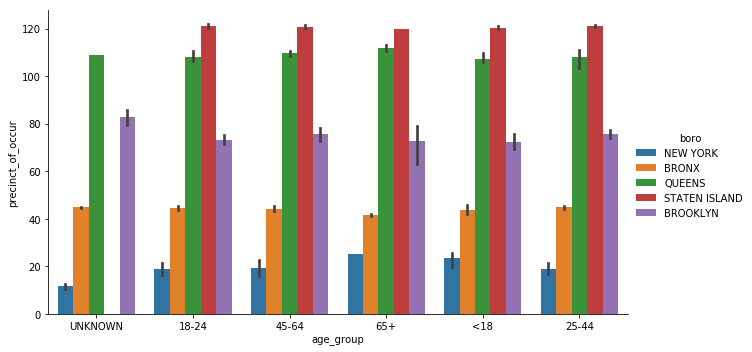

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=sns.catplot(x="age_group", y="precinct_of_occur",hue = "boro", data=cc_dataframe, aspect = 1.8, kind = "bar").set_title("Number of shooting incidents in borough with years",fontsize=18)
fig.savefig("graph.png")

##### No of count of summons issued to criminal according to the age-group and borough

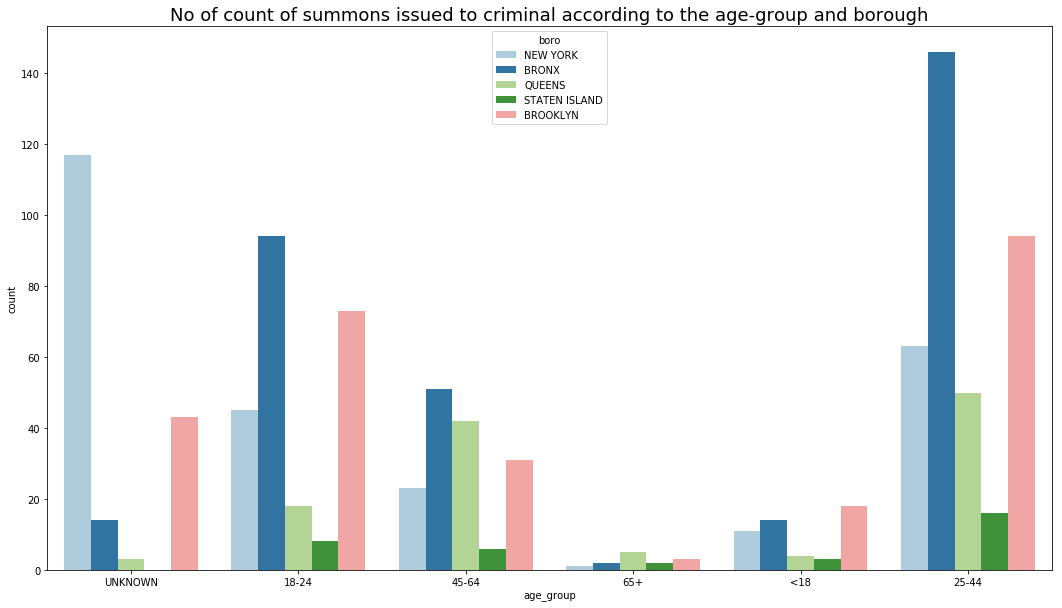

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize =(18,10))

sns.countplot(x="age_group",hue = "boro", data=cc_dataframe, palette = sns.color_palette("Paired")).set_title("No of count of summons issued to criminal according to the age-group and borough",fontsize=18)

plt.savefig("graph.png")

###### Precinct of occur against sex and race

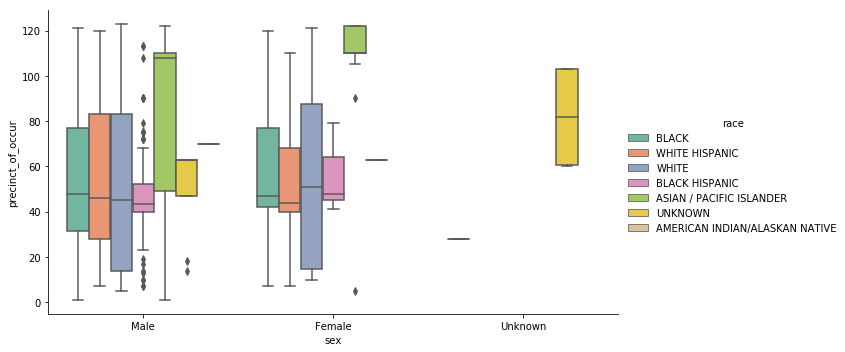

In [144]:
sns.catplot(x="sex", y="precinct_of_occur", hue = "race",kind = "box", data=cc_dataframe, aspect =1.8, palette = sns.color_palette("Set2"))

###### No of counts of law description

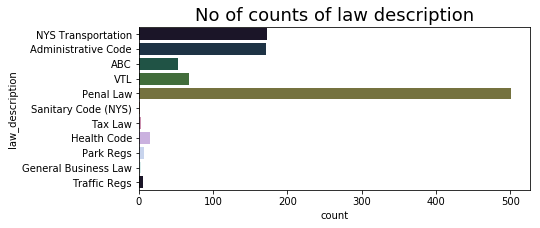

In [171]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="law_description", data=cc_dataframe, palette = sns.color_palette("cubehelix", 10)).set_title("No of counts of law description",fontsize=18)
plt.savefig("graph2.png")
